# GLM model with Gamma log-link function

Chose the Gamma log-link function since it is adapted to modeling positive and right-skewed continuous data (see [Health Insurance EDA SweetViz Report](health_insurance_EDA.html))

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("..\data\cleaned_insurance.csv")

formula = "charges ~ age + bmi + children + sex + smoker + region_northwest + region_southeast + region_southwest"

model = smf.glm(formula=formula, data=df, 
                family=sm.families.Gamma(sm.families.links.log())).fit()

print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1329
Model Family:                   Gamma   Df Model:                            8
Link Function:                    log   Scale:                         0.46695
Method:                          IRLS   Log-Likelihood:                -13307.
Date:                Sat, 15 Nov 2025   Deviance:                       337.73
Time:                        20:45:49   Pearson chi2:                     621.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6833
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.3863      0.111  

c:\Users\Patricia Avram\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


The coeffients shown above are on the log scale (since we use a log-link function). 
- First notice that there are some variables that are not considered statistically significant in this analysis (p-value>0.1): such as sex and region_northwest
- The deviance of the model is 337.73
- The Pearson Chi-Square coefficient is 621, which suggests some overdispersion or residual variability
- The Pseudo R2 coefficient is 0.6833, or 68.3%, indicating that 68% of the variation in charges is explained by the predictors chosen for this model.

If we interpret the coefficients: 
1. For each extra year of age, expected charges grow by exp(0.0286) = 1.029, or around 2.9% higher
2. Each unit increase in bmi leads to an increase of 1.4% in expected cost, which makes sense since higher BMI leads to more health issues
3. For each additional child there is an 8.8% increase in expected cost, possibly due to family coverages
4. The sex variable is not significant at a 10% level which suggests that there is not enough evidence to say that gender had a part to play in the cost, holding other variables constant
5. The smoker variable has the most significant coefficient (1.5003), leading to an exp(1.5003) = 4.48 x increase in expected charges. Very strong and significant predictor
6. Regions as a comparison with northeast (baseline region):
    - Northwest (-0.0579): not significant (0.281>0.1)
    - Southeast (-0.1416): significant, 13% lower charges
    - Southwest (-0.1455): significant, 14% lower charges

In [3]:
# Trying without certain predictors that are not relevant, i.e. sex and region_northwest 

formula2 = "charges ~ age + bmi + children + smoker + region_southeast + region_southwest"

model2 = smf.glm(formula=formula2, data=df, 
                family=sm.families.Gamma(sm.families.links.log())).fit()

print(model2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1331
Model Family:                   Gamma   Df Model:                            6
Link Function:                    log   Scale:                         0.46482
Method:                          IRLS   Log-Likelihood:                -13308.
Date:                Sat, 15 Nov 2025   Deviance:                       339.35
Time:                        20:45:55   Pearson chi2:                     619.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6841
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.3373      0.107  

c:\Users\Patricia Avram\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


- Notice similar Deviance, Pearson Chi-Squared, Pseudo R2 coefficients as previous model, taking out the non-significant variables didn't affect the model much

In [4]:
# Trying with interaction factors between smoker and bmi for instance, or age and bmi
formula4 = "charges ~ age + bmi + I(bmi**2) + children + smoker + region_southeast + region_southwest + smoker:bmi + age:bmi"

model4 = smf.glm(formula=formula4, data=df, 
                family=sm.families.Gamma(sm.families.links.log())).fit()

print(model4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1328
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                         0.44475
Method:                          IRLS   Log-Likelihood:                -13270.
Date:                Sat, 15 Nov 2025   Deviance:                       319.39
Time:                        20:45:59   Pearson chi2:                     591.
No. Iterations:                    17   Pseudo R-squ. (CS):             0.7100
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.6161      0.421  

c:\Users\Patricia Avram\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


- Doesn't seem like the interaction term between age and bmi is significant at the 10% level
- The smoker and bmi interaction term is very significant, but renders the smoker and bmi predictors insignificant, will only keep the smoker:bmi interaction term in glm models
- The Deviance, and Pearson Chi-Squared coefficients are lower than any previous model tested, and the Pseudo R2 coefficient is higher than previous models

In [5]:
# Trying with interaction factor between smoker and bmi, and those separate predictors removed from the model
formula5 = "charges ~ age + children + region_southeast + region_southwest + smoker:bmi"

model5 = smf.glm(formula=formula5, data=df, 
                family=sm.families.Gamma(sm.families.links.log())).fit()

print(model5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1332
Model Family:                   Gamma   Df Model:                            5
Link Function:                    log   Scale:                         0.45066
Method:                          IRLS   Log-Likelihood:                -13279.
Date:                Sat, 15 Nov 2025   Deviance:                       323.04
Time:                        20:46:02   Pearson chi2:                     600.
No. Iterations:                    17   Pseudo R-squ. (CS):             0.7035
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.7388      0.060  

c:\Users\Patricia Avram\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


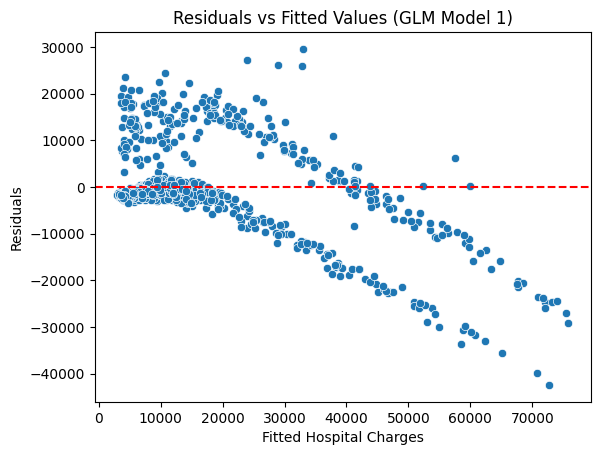

In [6]:
# Plotting the residuals of the first model

residuals = model.resid_response
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values (GLM Model 1)")
plt.xlabel("Fitted Hospital Charges")
plt.ylabel("Residuals")
plt.show()

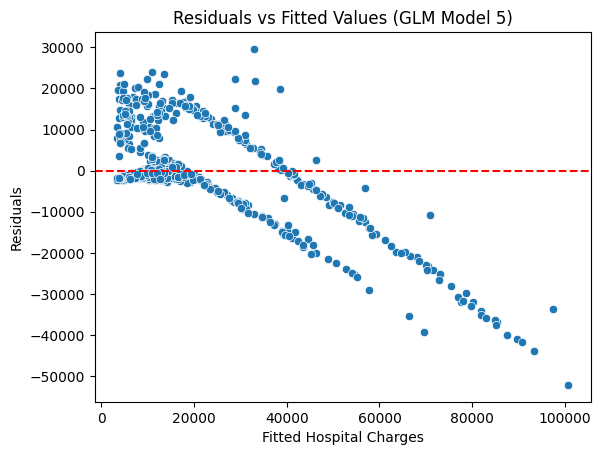

In [7]:
# Plotting the residuals of the 5th model with interaction term

residuals5 = model5.resid_response
sns.scatterplot(x=model5.fittedvalues, y=residuals5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values (GLM Model 5)")
plt.xlabel("Fitted Hospital Charges")
plt.ylabel("Residuals")
plt.show()

There is definitely a noticeable pattern in both of those residual plots. The X axis is the fitted hospital charges, and the Y axis is the residuals. The shape of the residual plot suggests that the model is not capturing all the interactions or non linear terms that could cause high costs. This is possible because the nature of hospital cost data is very right-skewed, so a GLM cannot capture the high or very high hospital costs as well as it does for lower costs. As we see in the residual plots, the lower hospital charges are distributed more evenly around the line than higher hospital charges (for instance higher than $20 000). This residuals plot shows that the model has trouble scaling linearly as the actual costs get larger.

## Prediction of hospital costs using the GLM model

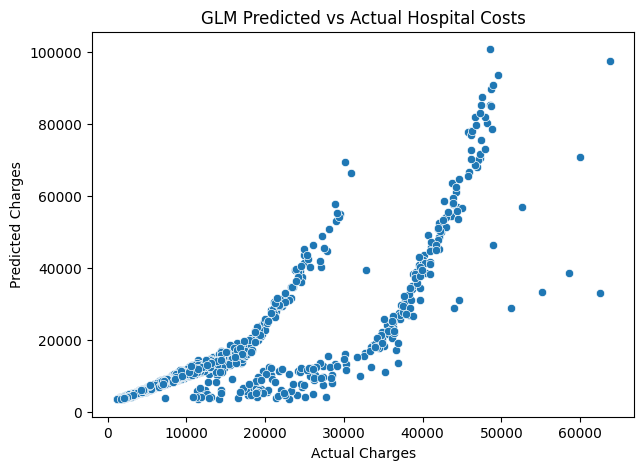

In [8]:
# Predicted hospital costs
df['predicted_charges'] = model5.predict(df)

plt.figure(figsize=(7,5))
sns.scatterplot(x=df['charges'], y=df['predicted_charges'])
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("GLM Predicted vs Actual Hospital Costs")
plt.show()

- The plot of predicted vs actual hospital charges shows a clear nonlinear pattern, suggesting that the GLM tends to underestimate high costs and overestimate moderate-cost cases
- The curvature suggests that a nonlinear model may represent the relationship better

In [9]:
df['log_charges'] = np.log(df['charges'])

model_log = smf.ols("log_charges ~ age + bmi + children + sex + smoker + region_northwest + region_southeast + region_southwest", data=df).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:46:17   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0306      0.072  

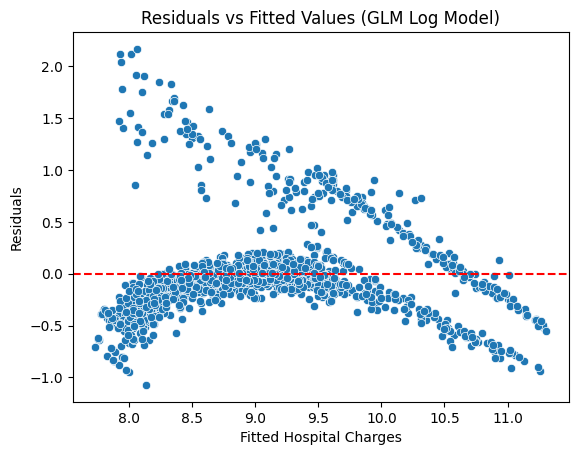

In [10]:
log_residuals = model_log.resid
sns.scatterplot(x=model_log.fittedvalues, y=log_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values (GLM Log Model)")
plt.xlabel("Fitted Hospital Charges")
plt.ylabel("Residuals")
plt.show()

There is clear curvature in the residual plot of the log-charges transformed model: The model will need fine tuning to take into account interaction or polynomial terms. See below

In [11]:
# List of possible interactions
interactions = [
    "smoker:bmi",
    "age:bmi",
    "age:smoker",
    "sex:bmi",
    "sex:smoker",
    "age:children",
    "region_northwest:bmi",
    "region_southeast:bmi",
    "region_southwest:bmi",
    "region_northwest:age",
    "region_southeast:age",
    "region_southwest:age",
    "children:smoker",
    "children:bmi",
]

base_formula = (
    "log_charges ~ age + bmi + children + sex + smoker + region_northwest + region_southeast + region_southwest"
)

base_model = smf.ols(base_formula, data=df).fit()
baseline_aic = base_model.aic
baseline_bic = base_model.bic

print("Base model AIC:", baseline_aic)
print("Base model BIC:", baseline_bic)

Base model AIC: 1635.0333985266507
Base model BIC: 1681.8237796928443


In [12]:
# For interactions models, generate AIC/BIC to evaluate model fit
results = []

for inter in interactions:
    formula = base_formula + " + " + inter
    model = smf.ols(formula, data=df).fit()
    
    results.append({
        "interaction": inter,
        "AIC": model.aic,
        "BIC": model.bic,
        "delta_AIC": model.aic - baseline_aic,
        "delta_BIC": model.bic - baseline_bic
    })

results_df = pd.DataFrame(results)

In [14]:
# Rank models by AIC improvement
ranked_aic = results_df.sort_values("delta_AIC")
# ranked_bic = results_df.sort_values("delta_BIC")

print("=== Ranked by AIC Improvement ===")
display(ranked_aic)

# Select most impactful interactions
# Rule: delta AIC < -2 is considered a meaningful improvement

best_interactions = ranked_aic[ranked_aic["delta_AIC"] < -2]["interaction"].tolist()

print("Best interactions (AIC improvement > 2):")
print(best_interactions)

=== Ranked by AIC Improvement ===


,interaction,AIC,BIC,delta_AIC,delta_BIC
2,age:smoker,1401.282199,1453.271512,-233.751199,-228.552268
0,smoker:bmi,1544.106538,1596.095850,-90.926861,-85.727929
12,children:smoker,1603.691694,1655.681006,-31.341705,-26.142773
5,age:children,1607.023908,1659.013220,-28.009491,-22.810560
4,sex:smoker,1629.665938,1681.655250,-5.367461,-0.168529
11,region_southwest:age,1634.017291,1686.006604,-1.016107,4.182824
1,age:bmi,1635.126415,1687.115727,0.093016,5.291948
10,region_southeast:age,1635.711510,1687.700822,0.678111,5.877042
7,region_southeast:bmi,1635.757751,1687.747063,0.724352,5.923283
9,region_northwest:age,1635.790520,1687.779833,0.757122,5.956053


Best interactions (AIC improvement > 2):
['age:smoker', 'smoker:bmi', 'children:smoker', 'age:children', 'sex:smoker']


In [15]:
# Build final model with the best interactions

if len(best_interactions) > 0:
    final_formula = base_formula + " + " + " + ".join(best_interactions)
else:
    final_formula = base_formula

print("Final model formula:")
print(final_formula)

final_model = smf.ols(final_formula, data=df).fit()

print("Final model summary:")
print(final_model.summary())


Final model formula:
log_charges ~ age + bmi + children + sex + smoker + region_northwest + region_southeast + region_southwest + age:smoker + smoker:bmi + children:smoker + age:children + sex:smoker


Final model summary:
                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     510.7
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:49:23   Log-Likelihood:                -585.47
No. Observations:                1338   AIC:                             1199.
Df Residuals:                    1324   BIC:                             1272.
Df Model:                          13                                         
Covariance Type:            nonrobust                            

## Visualisations

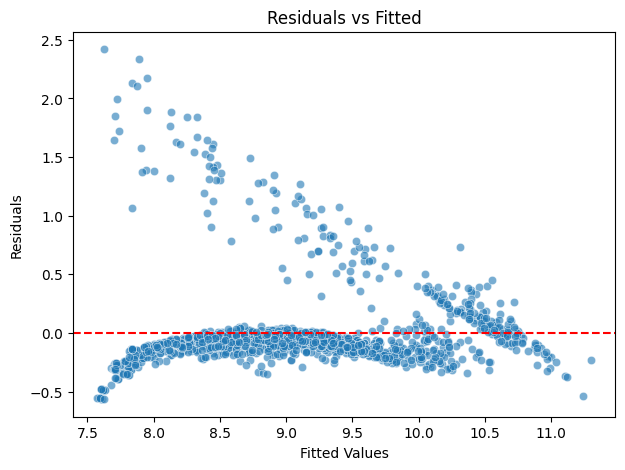

In [16]:
# Plotting residuals vs fitted values
fitted_vals = final_model.fittedvalues
residuals = final_model.resid

plt.figure(figsize=(7,5))
sns.scatterplot(x=fitted_vals, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

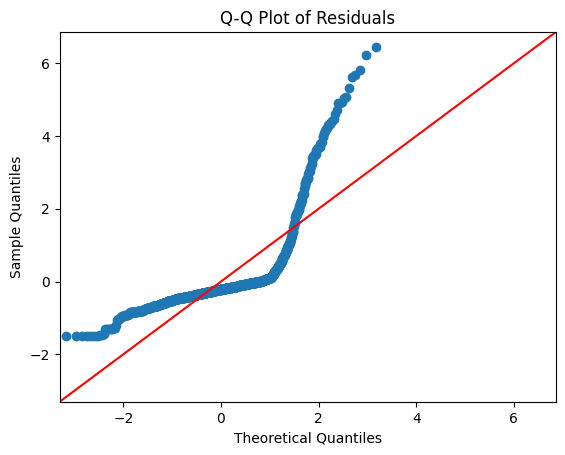

In [17]:
# Plotting Q-Q plot of residuals
sm.qqplot(residuals, line="45", fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

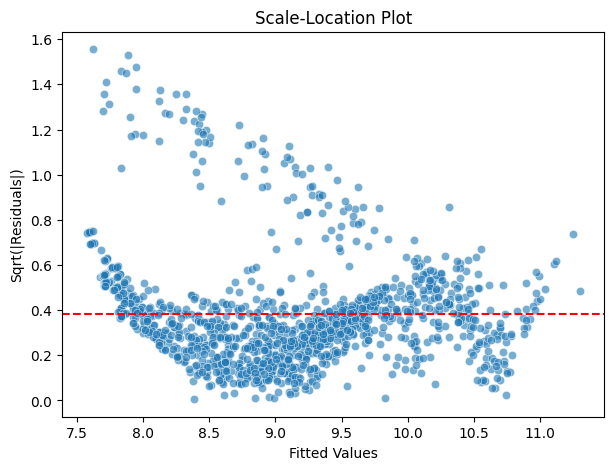

In [18]:
# Plotting scale location, good for finding heteroskedasticity
plt.figure(figsize=(7,5))
sns.scatterplot(x=fitted_vals, y=np.sqrt(np.abs(residuals)), alpha=0.6)
plt.xlabel("Fitted Values")
plt.ylabel("Sqrt(|Residuals|)")
plt.title("Scale-Location Plot")
plt.axhline(np.mean(np.sqrt(np.abs(residuals))), color="red", linestyle="--")
plt.show()


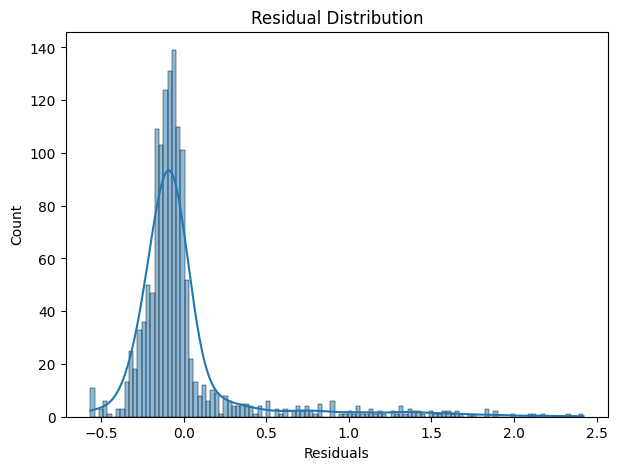

In [19]:
# Plot residual histogram & KDE
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()


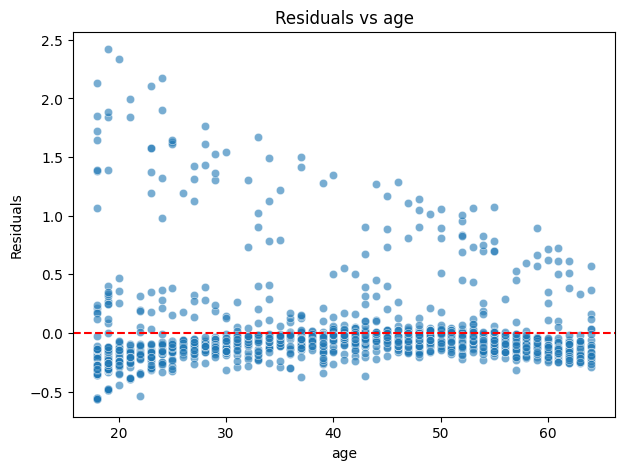

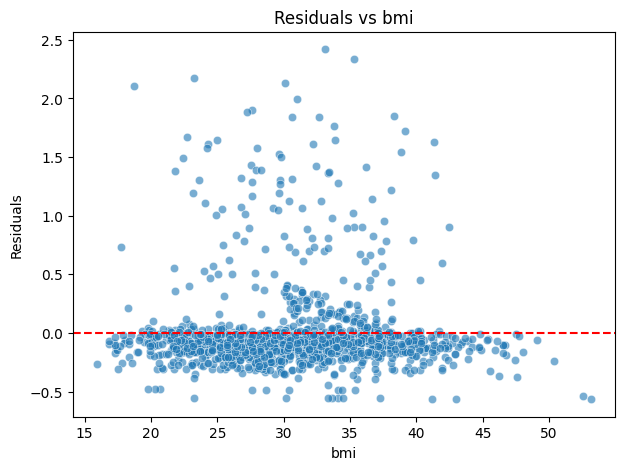

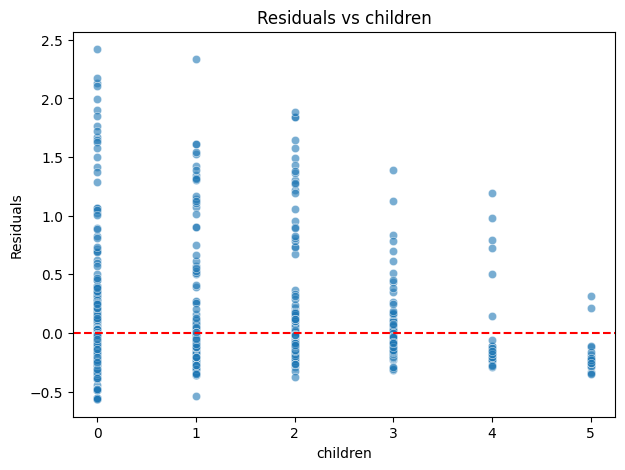

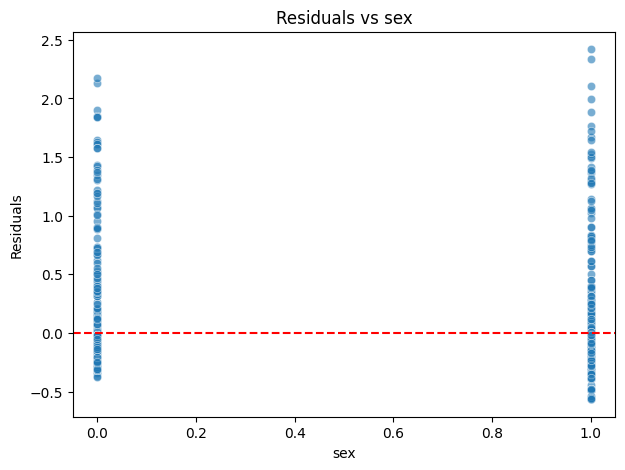

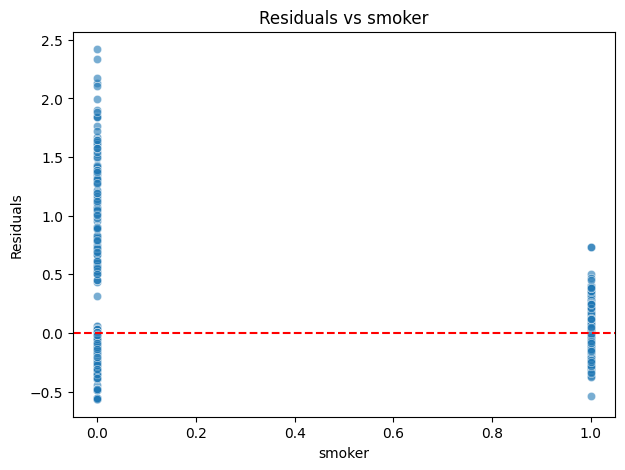

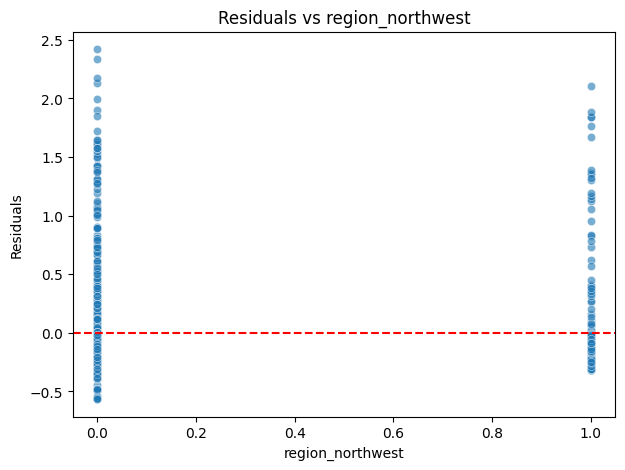

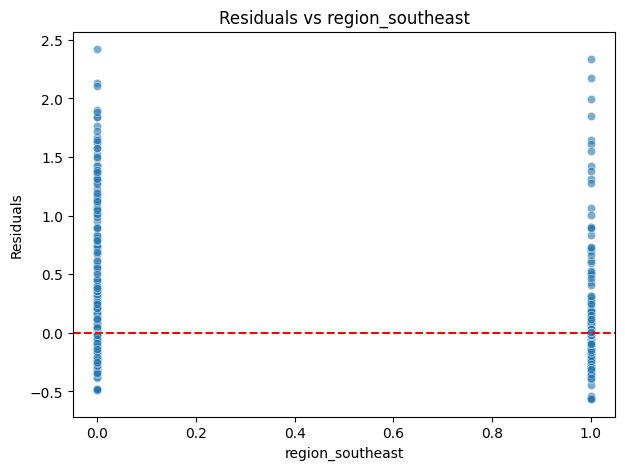

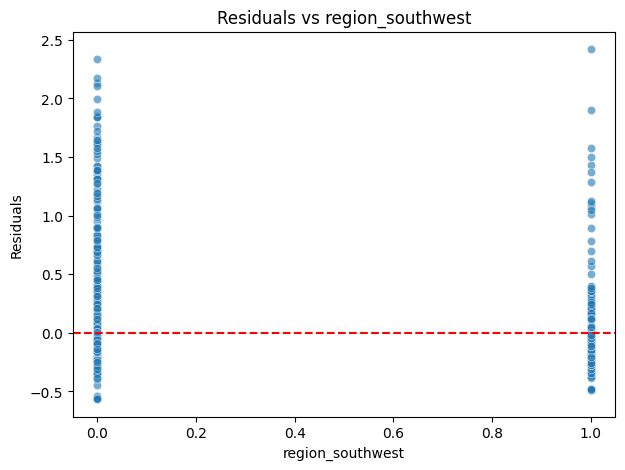

In [20]:
# Plot residuals vs each predictor
predictors = ["age", "bmi", "children", "sex", "smoker",
              "region_northwest", "region_southeast", "region_southwest"]

for col in predictors:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=df[col], y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(col)
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs {col}")
    plt.show()


From the residual plots for the age, bmi, smoker and children predictors, we notice that there is presence of heteroskedasticity in the data, which means that using a GLM model might not be the most appropriate for a task like this. Instead, we will pivot back to decision trees or an xgboost model that can capture the structure of hospital charges data, which is **highly skewed and driven by nonlinear relationships**. Even after **adding interactions and trying alternative distributions**, the residuals display strong heteroskedasticity and **clear nonlinear patterns**, which suggests that a more flexible modeling approach is needed for realistic prediction of healthcare costs.